In [69]:
import numpy as np
import pandas as pd

In [70]:
data_set = pd.read_csv('Flight_Price_Dataset_Q2.csv')
X = data_set.drop(columns='price')
Y = data_set['price']

In [71]:
#Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [72]:
#Data Filling
data_set.isnull().sum()

departure_time    0
stops             0
arrival_time      0
class             0
duration          0
days_left         0
price             0
dtype: int64

In [73]:
#One_Hot Encoding
x_train = pd.concat([x_train, pd.get_dummies(x_train['departure_time'],dtype=int)], axis= 1)
x_train = pd.concat([x_train, pd.get_dummies(x_train['stops'],dtype=int)], axis= 1)
x_train = pd.concat([x_train, pd.get_dummies(x_train['arrival_time'],dtype=int)], axis= 1)
x_train = pd.concat([x_train, pd.get_dummies(x_train['class'],dtype=int)], axis= 1)

x_test = pd.concat([x_test, pd.get_dummies(x_test['departure_time'],dtype=int)], axis= 1)
x_test = pd.concat([x_test, pd.get_dummies(x_test['stops'],dtype=int)], axis= 1)
x_test = pd.concat([x_test, pd.get_dummies(x_test['arrival_time'],dtype=int)], axis= 1)
x_test = pd.concat([x_test, pd.get_dummies(x_test['class'],dtype=int)], axis= 1)

x_train = x_train.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])
x_test = x_test.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])


In [74]:
#Data Encoding

# x_train['departure_time_encoded'] = x_train['departure_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
# x_test['departure_time_encoded'] = x_test['departure_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

# x_train['arrival_time_encoded'] = x_train['arrival_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
# x_test['arrival_time_encoded'] = x_test['arrival_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

# x_train['stops_encoded'] = x_train['stops'].map({'zero': 1, 'one': 2, 'two_or_more': 3})
# x_test['stops_encoded'] = x_test['stops'].map({'zero': 1, 'one': 2, 'two_or_more': 3})

# x_train['class_encoded'] = x_train['class'].map({'Economy': 1, 'Business': 2})
# x_test['class_encoded'] = x_test['class'].map({'Economy': 1, 'Business': 2})


# x_train = x_train.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])
# x_test = x_test.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])



In [75]:
x_train

,duration,days_left,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,one,two_or_more,zero,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,Business,Economy
208210,16.92,17,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
248315,12.00,24,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0
168806,4.75,49,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
50629,8.42,21,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
14263,17.50,30,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162092,23.58,44,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
119831,17.83,35,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
263602,11.25,40,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0
17260,10.58,45,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1


In [76]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns, index=x_test.index)

In [77]:
from sklearn.metrics import mean_squared_error , r2_score
import time

class Regression:
    def __init__(self):
        self.mse_g = None
        self.r2_g = None
        self.weight = None

    def fit(self, x:pd.DataFrame, y:pd.DataFrame, epoch:int, learning_rate: int):
        m = len(x)
        if x.iloc[0, 0] != 1:
            x.insert(0, 'bias', 1)

        self.mse_g = np.ones(epoch)
        self.r2_g = np.ones(epoch)
        self.weight = np.ones(len(x_train.columns))

        start_time = time.time()
        for i in range(epoch):
            gradient = 2/m * x.T.dot(self.predict(x) - y)
            self.weight = self.weight - learning_rate * gradient
            self.mse_g[i] = mean_squared_error(y, self.predict(x))
            self.r2_g[i] = r2_score(y, self.predict(x))
        print ("My program took", time.time() - start_time, "to run")

    def predict(self, df:pd.DataFrame):
        if df.iloc[0, 0] != 1:
            df.insert(0, 'bias', 1)
        return np.dot(df, self.weight)

In [78]:
reg = Regression()

epochs = 100
reg.fit(x_train, y_train, epochs, 0.1)
reg.weight

c:\Users\RSKALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\RSKALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\RSKALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\RSKALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
c:\Users\RSKALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regressio

My program took 8.663746356964111 to run


c:\Users\RSKALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\RSKALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
c:\Users\RSKALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\RSKALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
c:\Users\RSKALA\AppData\Local\Programs\Python\

bias            -3.991255e+230
duration        -5.096807e+231
days_left       -1.272590e+232
Afternoon       -6.286969e+229
Early_Morning   -8.821953e+229
Evening         -8.724420e+229
Late_Night      -1.783025e+228
Morning         -9.325935e+229
Night           -6.574975e+229
one             -3.399291e+230
two_or_more     -1.771629e+229
zero            -4.148015e+229
Afternoon       -4.998906e+229
Early_Morning   -2.127864e+229
Evening         -1.036915e+230
Late_Night      -1.873334e+229
Morning         -8.482071e+229
Night           -1.206123e+230
Business        -1.258052e+230
Economy         -2.733203e+230
dtype: float64

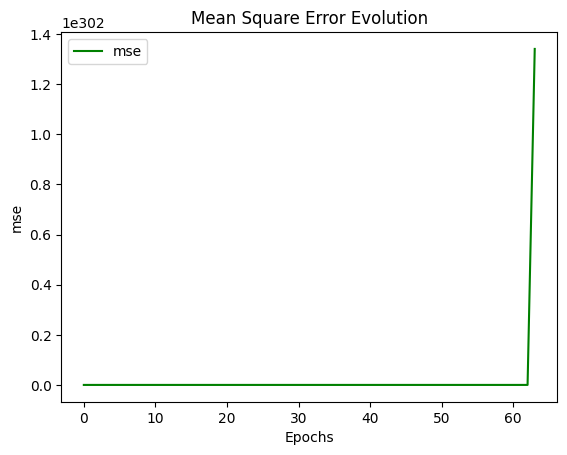

In [79]:
#mse plot
import matplotlib.pyplot as plt

plt.plot(range(epochs), reg.mse_g, 'g', label='mse')
plt.title('Mean Square Error Evolution')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

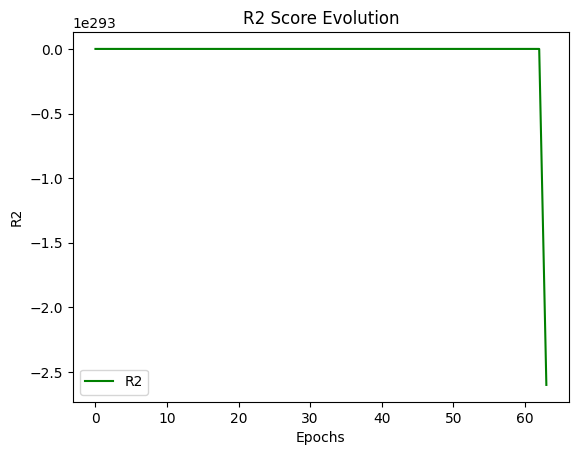

In [80]:
#R2 plot
plt.plot(range(epochs), reg.r2_g, 'g', label='R2')
plt.title('R2 Score Evolution')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.show()

In [81]:
#Evaluating Model
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred_test = reg.predict(x_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

ev_tabel = pd.DataFrame({'Value': [mae_test, mse_test, rmse_test, r2_test]}, index=['MAE', 'MSE', 'RMSE', 'R2'])
ev_tabel

c:\Users\RSKALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\RSKALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


,Value
MAE,3.937158e+233
MSE,inf
RMSE,inf
R2,-inf
